## 1 Message

The message I wanted to show was how events in 2020 affected streets in Dublin, and how it compares to previous years

## 2 Choice of charts

The message I wanted to show required comparing different streets over time

Temporal charts include the classic line chart, area chart and streamgraph

Streamgraphs are similar to area charts, but it has values displayed around a varying central axis. The layers are displaced to minimize the sum of the squared slopes of each layer, weigthed by the area of the layer.

They are more aesthetically pleasing and more engaging to look at compared to area charts.

However, it is impossible to read the exact values at a certain point, so streamgraphs should be used to see the trend of the data

Scatterplot is also an appropriate choices, as they show the relationship between 2 values, in this case time and number of people on a street

## 3 Making the chart

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact, interactive
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
from IPython.display import display
import datetime

In [ ]:
df = pd.read_csv('https://data.smartdublin.ie/dataset/cc421859-1f4f-43f6-b349-f4ca0e1c60fa/resource/3048794e-16bd-4edb-9ba9-8018a6aadcdb/download/jan-oct-2020-ped-data.csv')

df['Date & Time']= pd.to_datetime(df['Date & Time'], dayfirst=True)

I needed to compare the values at a particular time, so I took the dataframe when the Time column was at 18:00 each day

In [ ]:
new_df = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
  if row["Date & Time"].hour == 18:
    new_df = new_df.append(row)

In [ ]:
new_df.head()

,Date & Time,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street - Removed from site 20/10,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,Dame Street (Counter Missing),Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
18,2020-01-01 18:00:00,1388.0,1137.0,203.0,272.0,3674.0,2627.0,125.0,1289.0,201.0,828.0,1785.0,729.0,212.0,853.0,NaN,501.0,NaN,800.0,1834.0,1323.0,1095.0,795.0,430.0
42,2020-01-02 18:00:00,2703.0,1543.0,508.0,415.0,2613.0,4902.0,256.0,1125.0,353.0,1238.0,1374.0,1177.0,702.0,1202.0,NaN,719.0,NaN,1457.0,2231.0,2479.0,822.0,1347.0,1069.0
66,2020-01-03 18:00:00,2498.0,1600.0,513.0,483.0,2366.0,4726.0,374.0,1365.0,495.0,1358.0,1451.0,1172.0,665.0,1239.0,NaN,757.0,NaN,660.0,2277.0,2420.0,1245.0,1272.0,1164.0
90,2020-01-04 18:00:00,2347.0,1418.0,387.0,385.0,2992.0,4031.0,153.0,1076.0,388.0,1098.0,1156.0,1072.0,487.0,1191.0,NaN,559.0,NaN,1527.0,2013.0,2041.0,816.0,1147.0,722.0
114,2020-01-05 18:00:00,1673.0,1134.0,337.0,370.0,3032.0,2736.0,98.0,1060.0,112.0,703.0,763.0,945.0,357.0,935.0,NaN,340.0,NaN,884.0,1693.0,1388.0,491.0,847.0,524.0


In [ ]:
first_lockdown = datetime.datetime(2020, 3, 12)

eased_restictions = datetime.datetime(2020, 5, 5)

phase_3 = datetime.datetime(2020, 6, 29)

second_lockdown = datetime.datetime(2020, 10, 21)

For the line chart and streamgraphs, I did not want a one day outlier to heavily affect the shape of the graph

I made a function that returns the the average at 18:00 for each week

In [ ]:
def find_avg_week(street):
  current_week = 1
  weekly_averages = []
  total_week = 0
  for index, row in new_df.iterrows():
    if row['Date & Time'].week == current_week:
      total_week += row[street]
    else:
      weekly_averages.append(total_week / 7)
      current_week = row['Date & Time'].week
      total_week = row[street]
  return weekly_averages

def find_weeks():
  current_week = 0
  dates = []
  for index, row in new_df.iterrows():
    if current_week != row["Date & Time"].week:
      dates.append(row["Date & Time"])
      current_week += 1
  return dates[:-1]

weekly_dates = find_weeks()

In [ ]:
def make_graph(street1, street2, chart, key_events):

    x = new_df["Date & Time"]

    ax = plt.subplot()

    colour_map = ['#6DA1E0', '#26C6DA']

    if chart == 'Line Chart':

      if street2 is not None:
        y1 = find_avg_week(street1)
        y2 = find_avg_week(street2)
        ax.plot_date(weekly_dates, y1,'b-', label=street1)
        ax.plot_date(weekly_dates, y2, 'b-', color='red',label=street2)

      else:
        y1 = find_avg_week(street1)
        ax.plot_date(weekly_dates, y1,'b-', label=street1)

    elif chart == 'Streamgraph':

      if street2 is not None:
        y1 = find_avg_week(street1)
        y2 = find_avg_week(street2)
        ax.stackplot(weekly_dates, [y1, y2], labels=[street1, street2], colors=colour_map, baseline='weighted_wiggle')

      else:
        y1 = find_avg_week(street1)
        ax.stackplot(weekly_dates, y1, labels=[street1], colors=colour_map,baseline='weighted_wiggle')

    else:

      if street2 is not None:
        y1 = new_df[street1]
        y2 = new_df[street2]
        ax.plot_date(x, y1, markersize=2, label=street1)
        ax.plot_date(x, y2, markersize=2, color='red', label=street2)

      else:
        y1 = new_df[street1]
        ax.plot_date(x, y1, markersize=2, label=street1)

    months = MonthLocator()
    monthsFmt = DateFormatter("%b")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)

    if key_events:
      ax.axvline(first_lockdown, color='black', linestyle='-', label='First Lockdown')
      ax.axvline(eased_restictions, color='black', linestyle='--', label='Eased Restrictions')
      ax.axvline(phase_3, color='black',linestyle=':', label='Phase 3')
      ax.axvline(second_lockdown, color='black', linestyle='-.', label='Second Lockdown')

    plt.legend(bbox_to_anchor=(1.55, 1), loc='upper right')
    ax.set_title('Number of people on Dublin Streets in 2020')
    ax.set_ylabel('People in thousands')
    ax.set_xlabel('Date')

I used the ipython interactive widget to make the chart interactive

I only included the streets that did not include empty values

In [ ]:
non_empty_streets = [name for name in new_df.columns[1:] if not np.isnan(new_df[name]).any()]

w = interactive(make_graph, street1=non_empty_streets, street2=[None] + non_empty_streets, chart=['Streamgraph', 'Line Chart', 'Scatter'], key_events=False)

display(w)

interactive(children=(Dropdown(description='street1', options=("O'Connell St Outside Pennys", "O'Connell St Ou…

For the streamgraph, I choose colors with low saturation, as the layers take up a lot of area of the chart

## Unusual Streets

1. Talbot Street North/South
2. Dawson Street
3. Bachelor's Walk


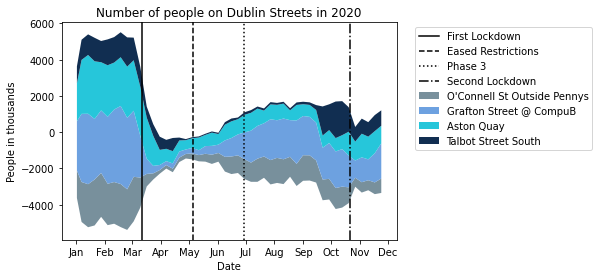

In [ ]:
def make_streamgraph(streets, key_events):
  ax = plt.subplot()

  colour_map = ['#78909C', '#6DA1E0', '#26C6DA', '#112E51']
  ax.stackplot(weekly_dates, [find_avg_week(n) for n in streets], labels=streets, baseline='weighted_wiggle', colors=colour_map)

  months = MonthLocator()
  monthsFmt = DateFormatter("%b")
  ax.xaxis.set_major_locator(months)
  ax.xaxis.set_major_formatter(monthsFmt)

  if key_events:
    ax.axvline(first_lockdown, color='black', linestyle='-', label='First Lockdown')
    ax.axvline(eased_restictions, color='black', linestyle='--', label='Eased Restrictions')
    ax.axvline(phase_3, color='black',linestyle=':', label='Phase 3')
    ax.axvline(second_lockdown, color='black', linestyle='-.', label='Second Lockdown')

  plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right')
  ax.set_title('Number of people on Dublin Streets in 2020')
  ax.set_ylabel('People in thousands')
  ax.set_xlabel('Date')

streets = ["O'Connell St Outside Pennys", "Grafton Street @ CompuB", "Aston Quay", "Talbot Street South"]

make_streamgraph(streets, True)

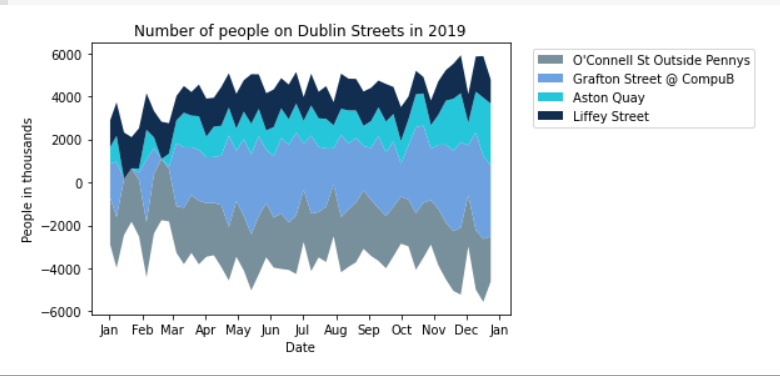

## Conclusion

I believe my charts affectively show how the pandemic in 2020 affected the number of people on Dublin Streets, by highlighting the trends over time